# Background 


# Problem Statement 

# Objectives 
* ```Develop a predictive model:``` To Build a robust time series model to generate accurate predictions of Microsoft's future stock prices.

* ```Improve investment decision-making:``` To Provide reliable predictions to assist investors in making informed investment decisions, optimizing portfolio allocation, and managing risk.

* ```Optimize trading strategies:``` To Enable traders to enhance their trading strategies by incorporating the predicted stock prices into their decision-making processes.

* ```Provide actionable insights:``` Extract meaningful insights from the analysis of historical stock market data and communicate them effectively to stakeholders.

* ```Enhance decision support tools:``` To create user-friendly interfaces to facilitate easy access to predictions and insights

# Business Understanding 


# Data Understanding

The dataset used in this project contains Microsoft stock market information from 01/01/2015 through 01/19/2021. It is acquired from Yahoo Finance and consists of several columns that provide valuable insights into the stock's performance and trading activity. The key columns in the dataset are as follows:

* ```Date:``` This column represents the date in the format yy-mm-dd, indicating the trading day for which the stock information is recorded.

* ```Open:``` The "Open" column denotes the price of Microsoft stock at the market open, reflecting the initial trading price for the day.

* ```High:``` The "High" column indicates the highest price reached by Microsoft stock during the trading day, capturing the peak value achieved.

* ```Low:``` The "Low" column represents the lowest price reached by Microsoft stock during the trading day, providing insight into the minimum value observed.

* ```Close:``` The "Close" column signifies the final price of Microsoft stock at the market close, reflecting the last traded price of the day.

* ```Volume:``` The "Volume" column denotes the number of shares traded for Microsoft stock on a given trading day, indicating the level of market activity.

* ```Adj Close:``` The 'Adj Close' column refers to the adjusted closing price of a stock. It is a modified version of the closing price that takes into account various factors such as dividends, stock splits, and other corporate actions

By analyzing this dataset, we can gain a comprehensive understanding of Microsoft's stock market performance, including the opening and closing prices, the range of prices throughout the day (high and low), and the trading volume. These features are crucial for identifying patterns, trends, and factors that may influence the stock's price movements.

The dataset covers a significant time period, allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices.

# Sucess Metrics 

* ```Prediction Sucess of the model``` : The models ability to accurately predict Microsoft's Stock prices.

In [69]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

In [49]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def _init_(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values
    
# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column]) 

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

In [50]:
# Read the data
df = pd.read_csv('Microsoft_Stock.csv')

In [51]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-20,46.299999,46.650002,45.570000,46.389999,40.299244,36161900
1,2015-01-21,45.939999,46.139999,45.480000,45.919998,39.890953,39081100
2,2015-01-22,46.380001,47.139999,46.080002,47.130001,40.942085,35898000
3,2015-01-23,47.360001,47.389999,46.799999,47.180000,40.985527,26211600
4,2015-01-26,47.000000,47.130001,46.240002,47.009998,40.837841,42525500


In [52]:
du = DataUnderstanding()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2118 non-null   object 
 1   Open       2118 non-null   float64
 2   High       2118 non-null   float64
 3   Low        2118 non-null   float64
 4   Close      2118 non-null   float64
 5   Adj Close  2118 non-null   float64
 6   Volume     2118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 116.0+ KB


$Inference$

* The dataset contains 1511 entries and 6 columns.


In [54]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* The dataset contains 0 null values.

In [55]:
# checking how many unique values we have on each column, besides the time data
df.iloc[:,0:6].nunique()

Date         2118
Open         1999
High         1971
Low          1980
Close        1983
Adj Close    2047
dtype: int64

In [56]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])



In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2118 non-null   datetime64[ns]
 1   Open       2118 non-null   float64       
 2   High       2118 non-null   float64       
 3   Low        2118 non-null   float64       
 4   Close      2118 non-null   float64       
 5   Adj Close  2118 non-null   float64       
 6   Volume     2118 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 116.0 KB


In [58]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Sort the data based on the index (date) if necessary
df.sort_index(inplace=True)

In [59]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-20,46.299999,46.650002,45.570000,46.389999,40.299244,36161900
2015-01-21,45.939999,46.139999,45.480000,45.919998,39.890953,39081100
2015-01-22,46.380001,47.139999,46.080002,47.130001,40.942085,35898000
2015-01-23,47.360001,47.389999,46.799999,47.180000,40.985527,26211600
2015-01-26,47.000000,47.130001,46.240002,47.009998,40.837841,42525500


In [60]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2.118000e+03
mean,150.819249,152.359027,149.237951,150.881454,146.230917,3.009004e+07
std,91.851184,92.873537,90.797100,91.890094,92.723707,1.371759e+07
min,40.340000,40.740002,39.720001,40.290001,35.095711,7.425600e+06
25%,64.477501,64.765001,64.142500,64.539999,59.492453,2.165552e+07
50%,119.444999,120.125000,118.549999,119.599998,114.554252,2.680555e+07
75%,237.992500,241.972503,235.357498,239.172497,236.813049,3.422862e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,1.691640e+08


# EDA 

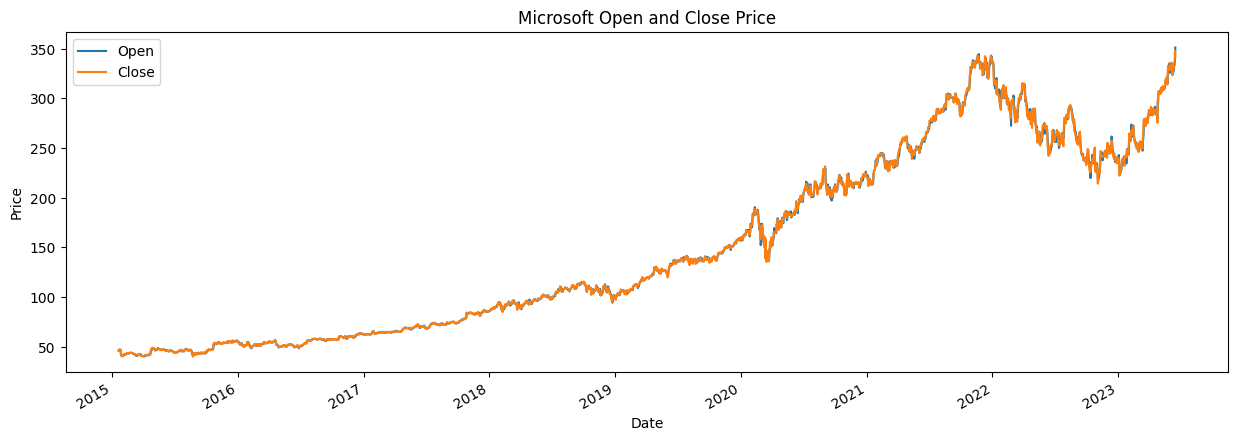

In [61]:
# plot of all year open and close price
df[['Open', 'Close']].plot(figsize=(15, 5))
plt.title('Microsoft Open and Close Price')
plt.ylabel('Price')
plt.show()

$Inference$

* The stock price of Microsoft has been increasing over the years.

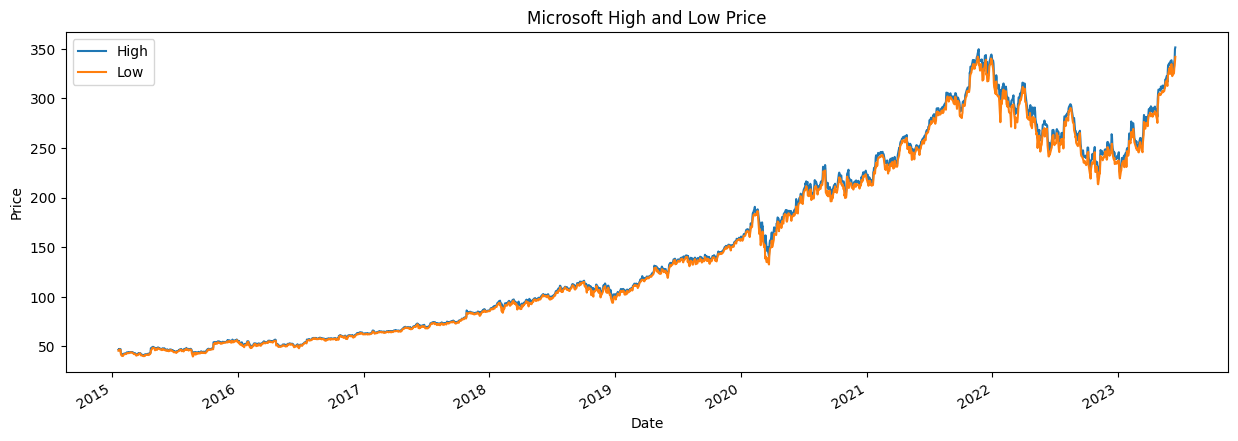

In [62]:
# plot of all year high and low price
df[['High', 'Low']].plot(figsize=(15, 5))
plt.title('Microsoft High and Low Price')
plt.ylabel('Price')
plt.show()

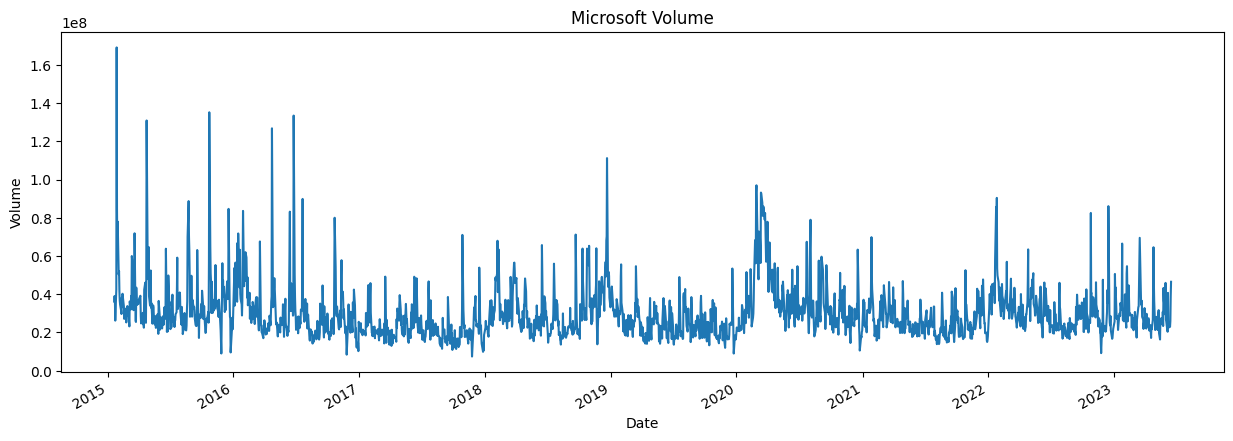

In [63]:
# plot of all year volume
df['Volume'].plot(figsize=(15, 5))
plt.title('Microsoft Volume')
plt.ylabel('Volume')
plt.show()

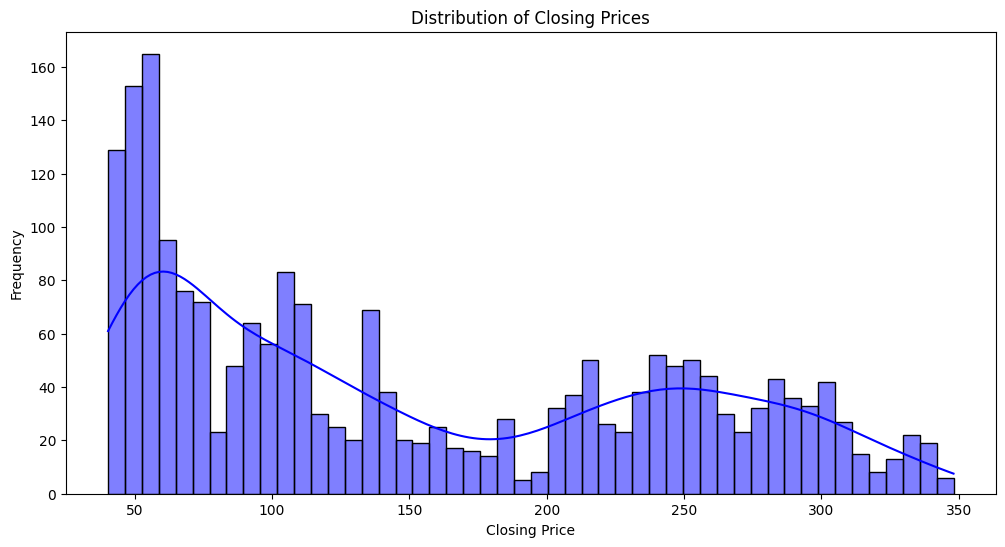

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

In [80]:
weekly_analysis = df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
weekly_analysis.head()

,Close,High,Low,Volume
Date,,,,
2015-01-25,46.655000,47.389999,45.480000,137352600
2015-02-01,42.653999,47.130001,40.349998,437786800
2015-02-08,41.916000,42.790001,40.230000,215214500
2015-02-15,42.860000,43.869999,42.180000,172848000
2015-02-22,43.617500,44.000000,43.049999,118131900


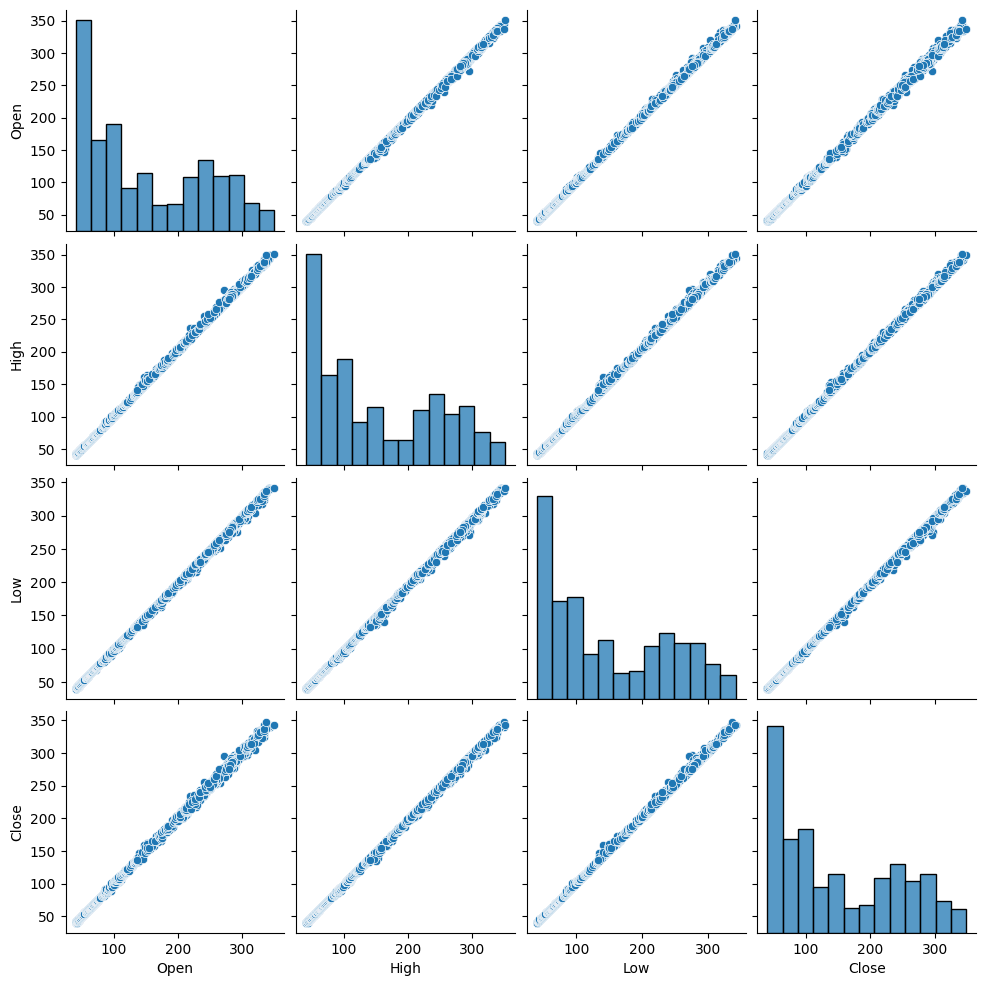

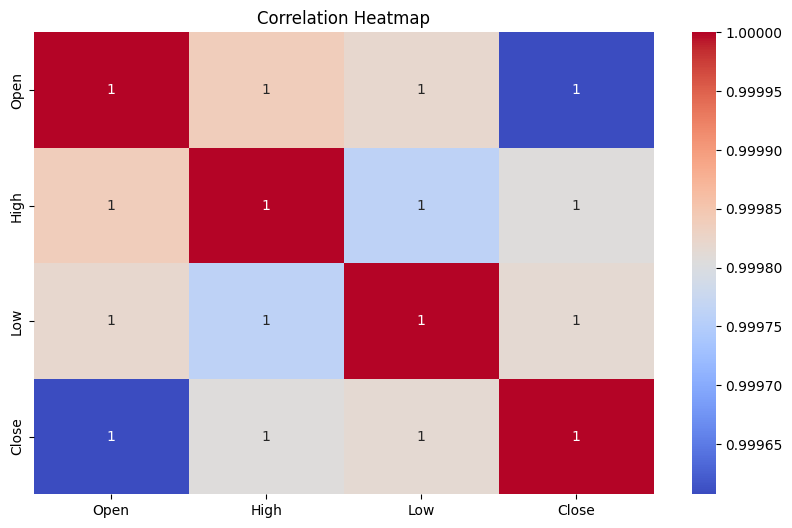

In [66]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.show()

# Heatmap to visualize the correlation between Open, High, Low, and Close prices
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Checking for Stationarity 

In [67]:
# Checking for Stationarity

rolmean = df['Close'].rolling(window=12).mean()
rolstd = df['Close'].rolling(window=12).std()
print(rolmean, rolstd)

Date
2015-01-20           NaN
2015-01-21           NaN
2015-01-22           NaN
2015-01-23           NaN
2015-01-26           NaN
                 ...    
2023-06-12    330.274170
2023-06-13    330.971670
2023-06-14    331.342501
2023-06-15    332.750003
2023-06-16    333.911667
Name: Close, Length: 2118, dtype: float64 Date
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
                ...   
2023-06-12    4.186702
2023-06-13    4.091493
2023-06-14    4.465716
2023-06-15    6.580912
2023-06-16    6.960705
Name: Close, Length: 2118, dtype: float64


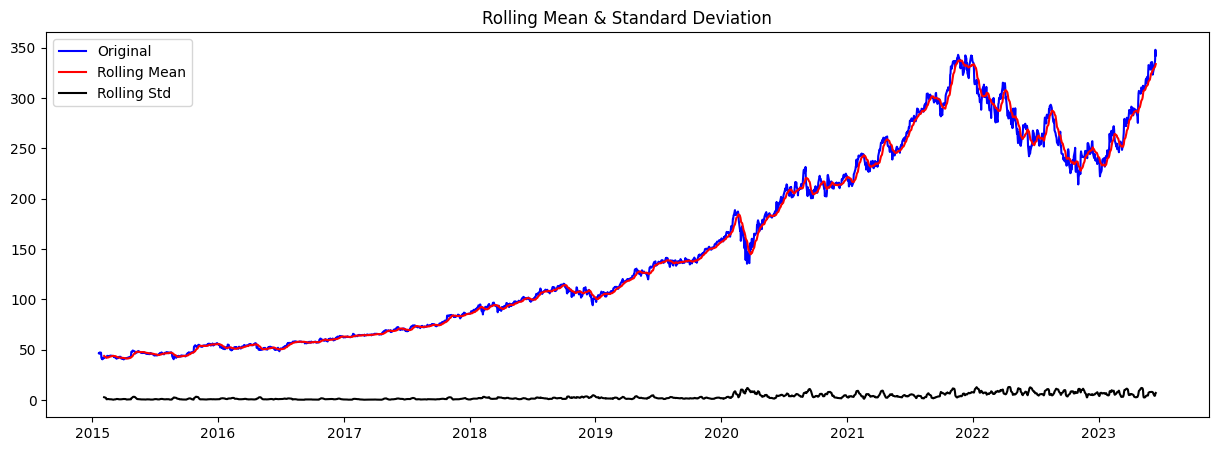

In [68]:
# Plot rolling statistics:
plt.figure(figsize=(15, 5))
orig = plt.plot(df['Close'], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [72]:
# Perform Dickey-Fuller test:

print('Results of Dickey-Fuller Test:')

dftest = adfuller(df['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                    0.339361
p-value                           0.979080
#Lags Used                        9.000000
Number of Observations Used    2108.000000
Critical Value (1%)              -3.433456
Critical Value (5%)              -2.862912
Critical Value (10%)             -2.567500
dtype: float64


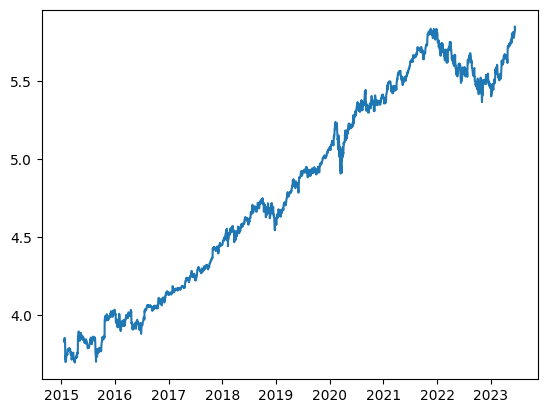

In [73]:
df_logScale = np.log(df['Close'])
plt.plot(df_logScale)

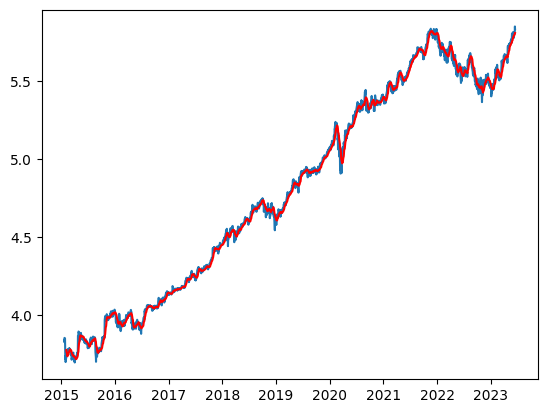

In [74]:
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()

plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [76]:
# Get the difference between the moving average and the actual closing price
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage

# Remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

Date
2015-02-04   -0.042126
2015-02-05   -0.020256
2015-02-06   -0.014572
2015-02-09   -0.006860
2015-02-10    0.007300
                ...   
2023-06-12    0.004834
2023-06-13    0.010047
2023-06-14    0.018022
2023-06-15    0.045276
2023-06-16    0.025097
Name: Close, Length: 2107, dtype: float64

In [77]:
# Checking for Stationarity

def test_stationarity(timeseries):
        #Determing rolling statistics
        movingAverage = timeseries.rolling(window=12).mean()
        movingSTD = timeseries.rolling(window=12).std()
    
        #Plot rolling statistics:
        plt.figure(figsize=(15, 5))
        orig = plt.plot(timeseries, color='blue', label='Original')
        mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
        std = plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' %key] = value
        print(dfoutput)

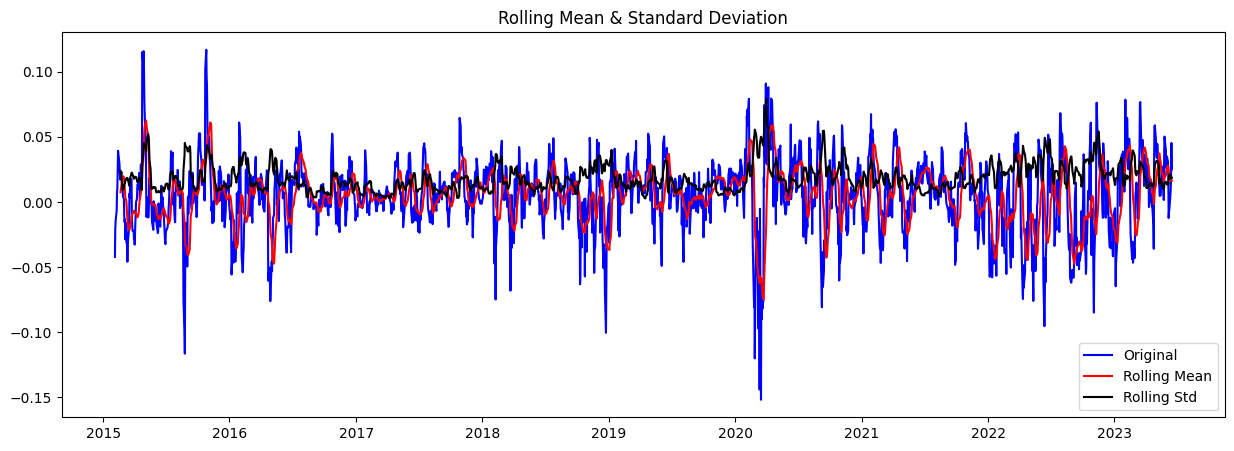

Results of Dickey-Fuller Test:
Test Statistic                -1.074337e+01
p-value                        2.781387e-19
#Lags Used                     1.400000e+01
Number of Observations Used    2.092000e+03
Critical Value (1%)           -3.433480e+00
Critical Value (5%)           -2.862923e+00
Critical Value (10%)          -2.567506e+00
dtype: float64


In [78]:
# Test the stationarity of the data
test_stationarity(datasetLogScaleMinusMovingAverage)